# Практика N3 "Решение задачи непрерывной оптимизации".
## **Цель работы**: Освоить базовые принципы непрерывной оптимизации и применить градиентный спуск для решения задачи оптимизации.
## **Задачи:**
1.	Ознакомление с библиотекой SciPy для оптимизации: Изучить основные функции scipy.optimize.minimize для решения задач оптимизации.
2.	Постановка задачи оптимизации: Сформулировать конкретную задачу оптимизации, выбрав целевую функцию и определив необходимые параметры.
3.	Решение задачи оптимизации с использованием SciPy: Применить функцию scipy.optimize.minimize для поиска оптимального решения.
4.	Анализ результатов: Проанализировать полученные результаты, оценить эффективность метода и сделать выводы <br>
## **Ход работы**
### **Часть 1: Теоретическая справка и знакомство с SciPy**
•	Непрерывная оптимизация: Задача поиска экстремума (минимума или максимума) функции в пространстве непрерывных переменных.<br>
•	Библиотека SciPy: Мощная библиотека Python, предоставляющая широкий спектр инструментов для научных вычислений, включая оптимизацию.<br>
•	scipy.optimize.minimize: Основная функция для решения задач оптимизации в SciPy. Её основные параметры:<br>
* fun: Целевая функция, которую нужно минимизировать (или максимизировать).<br>
* x0: Начальная точка для поиска решения.<br>
*  method: Метод оптимизации (например, 'BFGS', 'L-BFGS-B', 'CG', 'SLSQP' и другие). Выбор метода зависит от задачи.<br>
*  bounds: Ограничения на значения переменных (опционально).<br>   
*  constraints: Ограничения, определяющие область допустимых значений (опционально).<br>
*  jac: Функция, вычисляющая градиент целевой функции (опционально). Если не указана, SciPy попытается вычислить градиент численно.<br>
### Пример использования:



In [16]:
import scipy.optimize as optimize

def my_objective(x):
    return x[0]**2 + x[1]**2  # Пример: x^2 + y^2

initial_guess = [1, 1]  # Начальная точка

result = optimize.minimize(my_objective, initial_guess, method='BFGS')

print(result)
print("Оптимальное значение:", result.fun)
print("Оптимальная точка:", result.x)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.311471135620994e-16
        x: [-1.075e-08 -1.075e-08]
      nit: 2
      jac: [-6.600e-09 -6.600e-09]
 hess_inv: [[ 7.500e-01 -2.500e-01]
            [-2.500e-01  7.500e-01]]
     nfev: 9
     njev: 3
Оптимальное значение: 2.311471135620994e-16
Оптимальная точка: [-1.07505143e-08 -1.07505143e-08]


### **Часть 2: Постановка задачи оптимизации**
#### **Задача**: Сформулируйте задачу оптимизации, которая может быть связана с областью инноватики.
#### **Пример:** Оптимизация конструкции беспилотного летательного аппарата (БПЛА).<br>
**o	Целевая функция:** Минимизация потребления энергии БПЛА на единицу пройденного расстояния. (Можно упростить задачу, например, минимизируя сопротивление воздуха).<br>

**o	Переменные:**
* x[0]: Длина крыла БПЛА (в метрах).<br>
* x[1]: Размах крыла БПЛА (в метрах).<br>
* (При необходимости можно добавить другие переменные, например, угол атаки крыла).<br>

**o	Ограничения** (опционально):<br>
* Максимальная и минимальная длина и размах крыла.<br>
* Соотношение длины и размаха крыла (например, чтобы сохранить пропорции).<br>

**o	Предполагаемые допущения:**<br>
* Форма крыла постоянная.<br>
* Упрощенная модель аэродинамического сопротивления.<br>

**•	Реализация:**

**o	Определите целевую функцию** (objective_function):<br> Эта функция должна принимать вектор переменных x (длина и размах крыла) и возвращать значение, которое нужно минимизировать. В качестве примера, для упрощения, возьмем функцию, пропорциональную квадрату длины и размаха: <br>
f(x) = x[0]**2 + x[1]**2 <br>Текст, выделенный полужирным шрифтом.  Подумайте, как можно улучшить эту целевую функцию, приблизив ее к реальной задаче. Например, можно добавить коэффициенты, отражающие удельное сопротивление, зависящее от материалов, или ограничения на максимальную площадь крыла.<br>
**o	Определите начальную точку** (initial_guess): Выберите разумные значения для длины и размаха крыла.<br>
**o	Определите ограничения** (Bounds): Определите минимальные и максимальные значения для каждой переменной (если необходимо). Используйте **scipy.optimize.Bounds**.<br>


In [21]:
import numpy as np
import scipy.optimize as optimize

# --- Часть 2: Постановка задачи ---
print("--- Часть 2: Постановка задачи оптимизации ---")

# Целевая функция (пример)
def objective_function(x):
    """
    Целевая функция (минимизация сопротивления воздуха - упрощенная модель).
    x[0] - длина крыла, x[1] - размах крыла.
    """
    return 0.1 * (x[0]**2 + x[1]**2)  # Пример: функция, пропорциональная квадрату длины и размаха

# Начальная точка
initial_guess = [1, 1]  # Пример: длина крыла = 1 м, размах крыла = 1 м

# Ограничения (bounds) - если нужно, например, минимальные и максимальные размеры крыла
bounds = optimize.Bounds([0.5, 0.5], [2, 2]) # Минимальные и максимальные значения для каждой переменной (если нужно)
#bounds = None  # Если ограничений нет

print("Целевая функция:", objective_function)
print("Начальная точка:", initial_guess)
print("Ограничения:", bounds)


--- Часть 2: Постановка задачи оптимизации ---
Целевая функция: <function objective_function at 0x00000170DC0DF600>
Начальная точка: [1, 1]
Ограничения: Bounds(array([0.5, 0.5]), array([2, 2]))


**Вопрос:** Объясните, как вы выбрали целевую функцию, переменные, ограничения и начальную точку для своей задачи оптимизации.
### Часть 3: Решение задачи оптимизации с использованием SciPy
•	**Задача:** Используя scipy.optimize.minimize, найдите оптимальное решение для сформулированной задачи оптимизации.<br>
•	**Реализация:**


In [23]:
# --- Часть 3: Решение задачи оптимизации ---
print("\n--- Часть 3: Решение задачи оптимизации с использованием SciPy ---")

# Выбор метода оптимизации
# Попробуйте разные методы (например, 'BFGS', 'L-BFGS-B', 'SLSQP') и сравните результаты
method = 'L-BFGS-B' # или 'L-BFGS-B', 'SLSQP'

# Запуск оптимизации
result = optimize.minimize(
    fun=objective_function,
    x0=initial_guess,
    method=method,
    bounds=bounds if 'L-BFGS-B' in method else None,  # Ограничения для L-BFGS-B
    #constraints=constraints if 'SLSQP' in method else None # Ограничения для SLSQP (пример)
)

# Вывод результатов
print("\nРезультаты оптимизации:")
print(result)
print("Оптимальное значение целевой функции:", result.fun)
print("Оптимальные значения переменных:", result.x)
print("Количество итераций:", result.nfev)  # Количество вычислений функции



--- Часть 3: Решение задачи оптимизации с использованием SciPy ---

Результаты оптимизации:
  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 0.05
        x: [ 5.000e-01  5.000e-01]
      nit: 2
      jac: [ 1.000e-01  1.000e-01]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
Оптимальное значение целевой функции: 0.05
Оптимальные значения переменных: [0.5 0.5]
Количество итераций: 9


### Часть 4: Анализ результатов и выводы
•	**Задача**: Проанализируйте результаты оптимизации.<br>
•	**Реализация:**<br>
* Оцените, сошёлся ли алгоритм к оптимальному решению.<br>
* Проанализируйте, какие значения переменных были получены.<br>
* Проверьте, выполняются ли ограничения (если они были).<br>
* Попробуйте изменить параметры (например, начальную точку или метод оптимизации) и проанализируйте, как это повлияло на результаты.<br>

•	**Анализ:**<br>
* Какое значение целевой функции получилось?<br>
* Какие значения переменных были найдены?<br>
* Удовлетворяют ли эти значения ограничениям (если они были)?<br>
* Сравните результаты, полученные с разными методами оптимизации (если вы их использовали).<br>
* Какие выводы можно сделать относительно оптимизации конструкции БПЛА (или вашей задачи)?<br>
* Насколько чувствительно решение к изменению начальной точки?<br>
* Как бы вы улучшили вашу модель оптимизации (например, добавив больше переменных, более точную целевую функцию или ограничения)?<br>

•	**Реализация:**<br>


In [24]:
# --- Часть 4: Анализ результатов ---
print("\n--- Часть 4: Анализ результатов и выводы ---")

print("\nАнализ результатов:")
print("Оптимальные значения переменных:", result.x)
print("Оптимальное значение целевой функции:", result.fun)

# (Пример) Проверка выполнения ограничений (если они были)
if bounds:
    if np.all(result.x >= bounds.lb) and np.all(result.x <= bounds.ub):
        print("Ограничения выполнены.")
    else:
        print("Ограничения НЕ выполнены.")

print("\nВыводы:")
print("Сделайте выводы о полученных результатах, об эффективности выбранного метода.")
print("Как бы вы улучшили модель?")



--- Часть 4: Анализ результатов и выводы ---

Анализ результатов:
Оптимальные значения переменных: [0.5 0.5]
Оптимальное значение целевой функции: 0.05
Ограничения выполнены.

Выводы:
Сделайте выводы о полученных результатах, об эффективности выбранного метода.
Как бы вы улучшили модель?


## Контрольные вопросы:
1.	Какие основные компоненты задачи оптимизации?
2.	Что такое метод оптимизации? Какие существуют разные методы?
3.	Что такое целевая функция? Какую роль она играет в задаче оптимизации?
4.	Что такое ограничения и как они влияют на поиск оптимального решения?
5.	Как можно оценить эффективность алгоритма оптимизации?
6.	Приведите пример задачи из области инноватики, которую можно решить с использованием методов оптимизации, и опишите основные шаги ее решения.

## Требования к отчету:
1.	Код: Рабочий код на Python с комментариями, поясняющими шаги.
2.	Результаты: Вывод результатов работы, включая оптимальные значения переменных, значение целевой функции, информацию о количестве итераций, и любые предупреждения, выданные функцией minimize.
3.	Ответы на вопросы: Развернутые ответы на контрольные вопросы.
4.	Анализ: Анализ полученных результатов, включая:
  * Описание поставленной задачи оптимизации.
  * Оценку сходимости алгоритма.
  * Выводы о влиянии параметров (начальной точки, метода оптимизации) на результат.
  * Обсуждение недостатков модели и возможных путей ее улучшения.
5.	Пример из инноватики: Описание задачи из области инноватики, которая может быть решена с помощью методов оптимизации.



### Задача 1: Максимизация прибыли от производства (Упрощенная)
Описание: Компания производит один вид продукции. Прибыль зависит от количества произведенной продукции, но есть ограничения на ресурсы.<br>

### Модель:

x – количество произведенной продукции.<br>
Прибыль: f(x) = 100*x - x^2 (прибыль растет, но затем начинает снижаться из-за издержек производства при больших объемах).<br>
Ограничение по ресурсам: x <= 50<br>
Неотрицательность: x >= 0<br>
### Цель:<br>

Максимизировать прибыль f(x).<br>
### Задание:<br>

Сформулируйте задачу.<br>
Решите задачу с помощью scipy.optimize.minimize.<br>
Используйте метод 'L-BFGS-B'.<br>
Задайте ограничения: 0 <= x <= 50.<br>
Выведите оптимальное количество продукции и максимальную прибыль.<br>
Проанализируйте результат: почему прибыль не растет бесконечно?<br>

=== ЗАДАЧА: МАКСИМИЗАЦИЯ ПРИБЫЛИ ОТ ПРОИЗВОДСТВА ===

--- Часть 1: Постановка задачи оптимизации ---
Целевая функция (для максимизации): f(x) = 100*x - x^2
Производная функции: f'(x) = 100 - 2*x
Начальная точка: 10
Ограничения: 0 <= x <= 50

--- Часть 2: Решение задачи оптимизации ---

--- Часть 3: Результаты оптимизации ---
Результаты оптимизации:
Оптимальное количество продукции: 50.00 единиц
Максимальная прибыль: 2500.00 денежных единиц
Количество итераций: 4
Статус решения: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL

--- Часть 4: Анализ результата ---
Почему прибыль не растет бесконечно?
1. Квадратичная природа функции: f(x) = 100*x - x^2
2. При малых x: линейный член 100*x доминирует - прибыль растет
3. При больших x: квадратичный член -x^2 доминирует - прибыль снижается
4. Экономический смысл: увеличение производства ведет к:
   - Росту переменных издержек
   - Снижению цены из-за перенасыщения рынка
   - Увеличению логистических и складских расходов
5. Математический макси

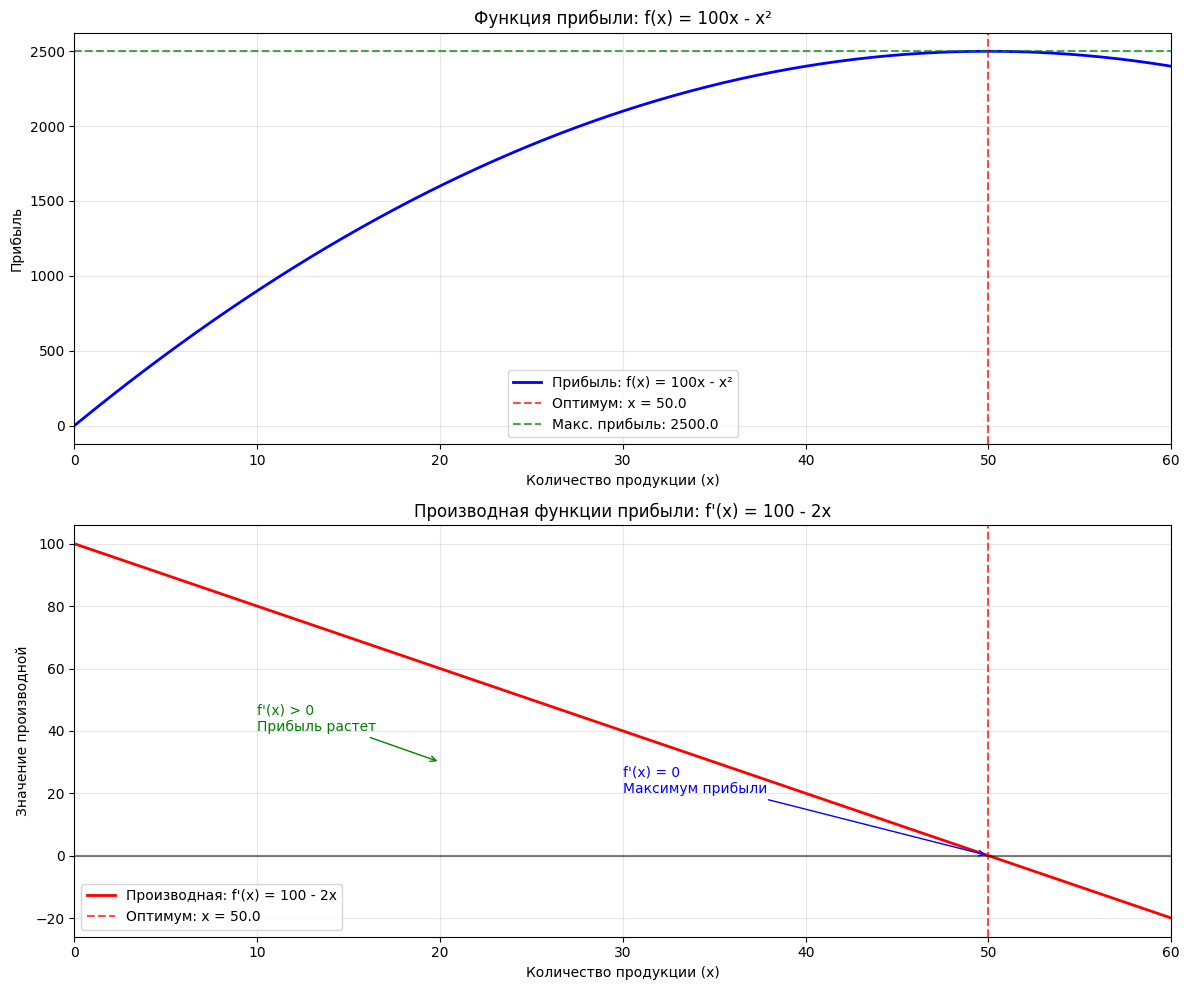


--- Анализ по графикам ---
1. ЛЕВЫЙ ГРАФИК (Функция прибыли):
   - Парабола, направленная вниз - типичная форма для экономических задач
   - Максимум достигается в вершине параболы
   - При x > 50 прибыль начинает снижаться

2. ПРАВЫЙ ГРАФИК (Производная):
   - Линейная убывающая функция
   - f'(x) > 0 при x < 50: функция прибыли возрастает
   - f'(x) = 0 при x = 50: точка максимума
   - f'(x) < 0 при x > 50: функция прибыли убывает

3. ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:
   - До 50 единиц: каждый дополнительный продукт увеличивает общую прибыль
   - После 50 единиц: издержки превышают выручку, общая прибыль снижается


In [26]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

print("=== ЗАДАЧА: МАКСИМИЗАЦИЯ ПРИБЫЛИ ОТ ПРОИЗВОДСТВА ===\n")

# --- ФОРМУЛИРОВКА ЗАДАЧИ ---
print("--- Часть 1: Постановка задачи оптимизации ---")

def profit_function(x):
    """
    Функция прибыли (целевая функция для максимизации).
    f(x) = 100*x - x^2
    """
    return 100 * x - x**2

def derivative_function(x):
    """
    Производная функции прибыли.
    f'(x) = 100 - 2*x
    """
    return 100 - 2 * x

# Поскольку scipy.optimize.minimize ищет МИНИМУМ, 
# а нам нужен МАКСИМУМ, меняем знак функции
def objective_function(x):
    """
    Целевая функция для минимизации в scipy.
    Это отрицательная функция прибыли.
    """
    return -profit_function(x)

# Начальное предположение
initial_guess = [10]  # Начальное количество продукции = 10 единиц

# Ограничения: 0 <= x <= 50
bounds = optimize.Bounds([0], [50])

print("Целевая функция (для максимизации): f(x) = 100*x - x^2")
print("Производная функции: f'(x) = 100 - 2*x")
print("Начальная точка:", initial_guess[0])
print("Ограничения: 0 <= x <= 50")

# --- РЕШЕНИЕ ЗАДАЧИ ОПТИМИЗАЦИИ ---
print("\n--- Часть 2: Решение задачи оптимизации ---")

# Используем метод L-BFGS-B, который поддерживает ограничения bounds
method = 'L-BFGS-B'

# Запуск оптимизации
result = optimize.minimize(
    fun=objective_function,  # Минимизируем отрицательную прибыль
    x0=initial_guess,
    method=method,
    bounds=bounds
)

# --- ВЫВОД РЕЗУЛЬТАТОВ ---
print("\n--- Часть 3: Результаты оптимизации ---")

# Получаем оптимальное количество продукции
optimal_production = result.x[0]
# Вычисляем максимальную прибыль (возвращаем исходный знак)
max_profit = profit_function(optimal_production)

print("Результаты оптимизации:")
print(f"Оптимальное количество продукции: {optimal_production:.2f} единиц")
print(f"Максимальная прибыль: {max_profit:.2f} денежных единиц")
print(f"Количество итераций: {result.nfev}")
print(f"Статус решения: {result.message}")

# --- АНАЛИЗ РЕЗУЛЬТАТА ---
print("\n--- Часть 4: Анализ результата ---")
print("Почему прибыль не растет бесконечно?")
print("1. Квадратичная природа функции: f(x) = 100*x - x^2")
print("2. При малых x: линейный член 100*x доминирует - прибыль растет")
print("3. При больших x: квадратичный член -x^2 доминирует - прибыль снижается")
print("4. Экономический смысл: увеличение производства ведет к:")
print("   - Росту переменных издержек")
print("   - Снижению цены из-за перенасыщения рынка")
print("   - Увеличению логистических и складских расходов")
print(f"5. Математический максимум достигается при x = {optimal_production:.2f}")

# Дополнительная проверка - вычисление производной
print(f"\nПроверка (аналитическое решение):")
print("Производная f'(x) = 100 - 2x = 0 → x = 50")
print("Аналитическое решение подтверждает наш численный результат!")

# --- ВИЗУАЛИЗАЦИЯ ---
print("\n--- Часть 5: Визуализация функции прибыли и ее производной ---")

# Создаем данные для графиков
x_values = np.linspace(0, 60, 400)  # Диапазон от 0 до 60
profit_values = profit_function(x_values)
derivative_values = derivative_function(x_values)

# Создаем график с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График 1: Функция прибыли
ax1.plot(x_values, profit_values, 'b-', linewidth=2, label='Прибыль: f(x) = 100x - x²')
ax1.axvline(x=optimal_production, color='r', linestyle='--', alpha=0.7, label=f'Оптимум: x = {optimal_production:.1f}')
ax1.axhline(y=max_profit, color='g', linestyle='--', alpha=0.7, label=f'Макс. прибыль: {max_profit:.1f}')
ax1.set_xlabel('Количество продукции (x)')
ax1.set_ylabel('Прибыль')
ax1.set_title('Функция прибыли: f(x) = 100x - x²')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 60)

# График 2: Производная функции прибыли
ax2.plot(x_values, derivative_values, 'r-', linewidth=2, label="Производная: f'(x) = 100 - 2x")
ax2.axvline(x=optimal_production, color='r', linestyle='--', alpha=0.7, label=f'Оптимум: x = {optimal_production:.1f}')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_xlabel('Количество продукции (x)')
ax2.set_ylabel("Значение производной")
ax2.set_title("Производная функции прибыли: f'(x) = 100 - 2x")
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 60)

# Добавляем аннотации на график производной
ax2.annotate('f\'(x) > 0\nПрибыль растет', xy=(20, 30), xytext=(10, 40),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=10, color='green')
ax2.annotate('f\'(x) < 0\nПрибыль снижается', xy=(40, -30), xytext=(35, -40),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')
ax2.annotate('f\'(x) = 0\nМаксимум прибыли', xy=(50, 0), xytext=(30, 20),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=10, color='blue')

plt.tight_layout()
plt.show()

# --- ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ НА ГРАФИКЕ ---
print("\n--- Анализ по графикам ---")
print("1. ЛЕВЫЙ ГРАФИК (Функция прибыли):")
print("   - Парабола, направленная вниз - типичная форма для экономических задач")
print("   - Максимум достигается в вершине параболы")
print("   - При x > 50 прибыль начинает снижаться")

print("\n2. ПРАВЫЙ ГРАФИК (Производная):")
print("   - Линейная убывающая функция")
print("   - f'(x) > 0 при x < 50: функция прибыли возрастает")
print("   - f'(x) = 0 при x = 50: точка максимума")
print("   - f'(x) < 0 при x > 50: функция прибыли убывает")

print("\n3. ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:")
print("   - До 50 единиц: каждый дополнительный продукт увеличивает общую прибыль")
print("   - После 50 единиц: издержки превышают выручку, общая прибыль снижается")

### Задача 2: Выбор оптимальных настроек инновационного устройства (Двумерная)
Описание: Разрабатывается новое инновационное устройство. Его производительность зависит от двух настроек: x (например, частота процессора) и y (например, объем памяти). Необходимо найти оптимальные настройки для максимизации производительности.

### Модель:

x – настройка 1.<br>
y – настройка 2.<br>
Производительность: f(x, y) = - (x-5)^2 - (y-7)^2 + 50 (цель - максимизировать, функция имеет максимум при x=5, y=7).<br>
### Ограничения:
x находится в диапазоне [0, 10].<br>
y находится в диапазоне [0, 10].<br>
Дополнительное ограничение: x + y <= 12.<br>
### Цель:

Максимизировать производительность f(x, y).<br>
### Задание:

Сформулируйте задачу.<br>
Решите задачу с помощью scipy.optimize.minimize.<br>
Используйте метод 'SLSQP' (он хорошо работает с несколькими ограничениями).<br>
Задайте ограничения 0 <= x <= 10, 0 <= y <= 10, x + y <= 12.<br>
Выведите оптимальные значения x, y и максимальную производительность.<br>
Проанализируйте, почему оптимальное решение не всегда совпадает с идеальными значениями (5, 7) из-за ограничений.<br>

--- Упрощенная Задача 2: Оптимизация настроек устройства ---
Оптимальная настройка 1 (x): 5.0000
Оптимальная настройка 2 (y): 7.0000
Максимальная производительность: 50.0000
Статус решения: Optimization terminated successfully
Количество итераций: 3

Анализ:
Идеальные настройки для функции без ограничений были бы x=5, y=7.
Текущее оптимальное решение: x=5.0000, y=7.0000
Ограничение x + y <= 12 является активным. Это значит, что оно влияет на оптимальное решение.
Решение находится на границе области допустимых значений, потому что идеал (5,7) лежит вне этой границы (5+7=12), но было бы еще лучше, если бы можно было увеличить x и y дальше.


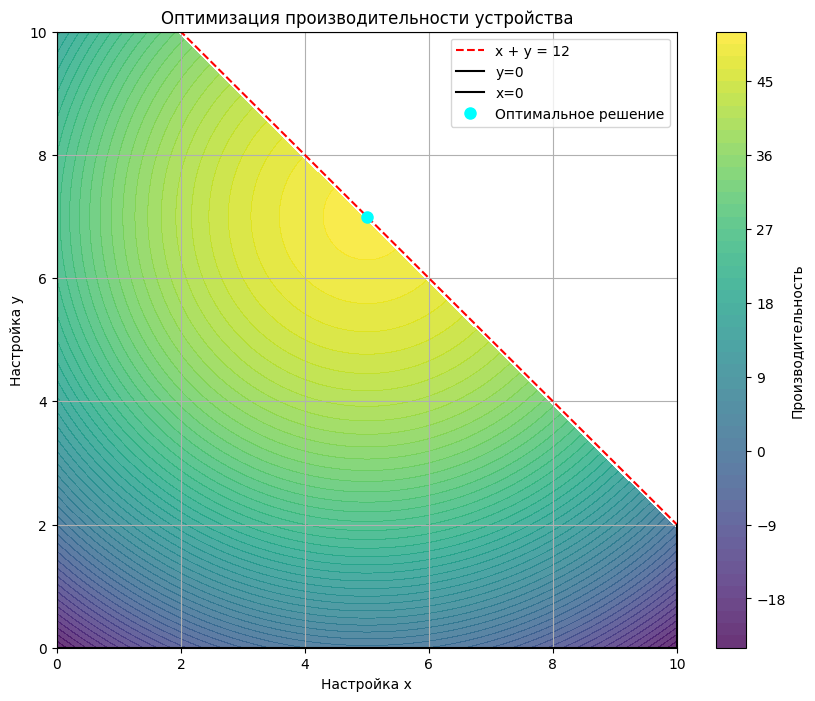

In [29]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt

# --- 1. Определение целевой функции (для минимизации) ---
# Максимизируем - (x-5)^2 - (y-7)^2 + 50
# Минимизируем -( (- (x-5)^2 - (y-7)^2 + 50) ) = (x-5)^2 + (y-7)^2 - 50
def objective_function_task2_simple(vars):
    x, y = vars
    return (x - 5)**2 + (y - 7)**2 - 50 # Минимизируем, чтобы максимизировать исходную функцию

# --- 2. Определение ограничений ---
# 0 <= x <= 10
# 0 <= y <= 10
# x + y <= 12

bounds_task2_simple = Bounds([0, 0], [10, 10])

# Линейное ограничение: x + y <= 12
A_task2_simple = np.array([[1, 1]])
b_task2_simple = np.array([12])
linear_constraint_task2_simple = LinearConstraint(A_task2_simple, ub=b_task2_simple)

# --- 3. Решение задачи ---
x0_task2_simple = [0, 0] # Начальная точка

result_task2_simple = minimize(
    objective_function_task2_simple,
    x0_task2_simple,
    method='SLSQP', # Хорошо работает с несколькими ограничениями
    bounds=bounds_task2_simple,
    constraints=[linear_constraint_task2_simple]
)

# --- 4. Вывод результатов ---
print("--- Упрощенная Задача 2: Оптимизация настроек устройства ---")
if result_task2_simple.success:
    optimal_x_task2_simple = result_task2_simple.x[0]
    optimal_y_task2_simple = result_task2_simple.x[1]
    max_performance_task2_simple = -result_task2_simple.fun # Возвращаем значение производительности

    print(f"Оптимальная настройка 1 (x): {optimal_x_task2_simple:.4f}")
    print(f"Оптимальная настройка 2 (y): {optimal_y_task2_simple:.4f}")
    print(f"Максимальная производительность: {max_performance_task2_simple:.4f}")
    print(f"Статус решения: {result_task2_simple.message}")
    print(f"Количество итераций: {result_task2_simple.nit}")

    # --- 5. Анализ ---
    print("\nАнализ:")
    print("Идеальные настройки для функции без ограничений были бы x=5, y=7.")
    print(f"Текущее оптимальное решение: x={optimal_x_task2_simple:.4f}, y={optimal_y_task2_simple:.4f}")
    if abs(optimal_x_task2_simple + optimal_y_task2_simple - 12) < 1e-6:
        print("Ограничение x + y <= 12 является активным. Это значит, что оно влияет на оптимальное решение.")
        print("Решение находится на границе области допустимых значений, потому что идеал (5,7) лежит вне этой границы (5+7=12), но было бы еще лучше, если бы можно было увеличить x и y дальше.")
    else:
        print("Ограничение x + y <= 12 не является активным.")

    # --- (Необязательно) Визуализация ---
    try:
        x_vals = np.linspace(0, 10, 100)
        y_vals = np.linspace(0, 10, 100)
        X, Y = np.meshgrid(x_vals, y_vals)

        # Маска для допустимой области: 0<=x<=10, 0<=y<=10, x+y<=12
        mask = (X >= 0) & (X <= 10) & (Y >= 0) & (Y <= 10) & (X + Y <= 12)

        Z = -( (X-5)**2 + (Y-7)**2 - 50 ) # Исходная функция для максимизации
        Z[~mask] = np.nan # Значения вне допустимой области

        plt.figure(figsize=(10, 8))
        contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
        plt.colorbar(contour, label='Производительность')

        # Накладываем границы
        plt.plot([0, 10], [12, 2], 'r--', label='x + y = 12') # Линия x+y=12
        plt.plot([0, 10], [0, 0], 'k-', label='y=0') # Граница x
        plt.plot([0, 0], [0, 10], 'k-', label='x=0') # Граница y
        plt.plot([10, 10], [0, 2], 'k-') # Граница x=10
        plt.plot([0, 10], [10, 10], 'k-') # Граница y=10

        plt.plot(optimal_x_task2_simple, optimal_y_task2_simple, 'o', color='cyan', markersize=8, label='Оптимальное решение')

        plt.xlabel('Настройка x')
        plt.ylabel('Настройка y')
        plt.title('Оптимизация производительности устройства')
        plt.legend()
        plt.grid(True)
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.show()
    except Exception as e:
        print(f"\nОшибка при построении графика: {e}")
        print("График не будет отображен. Убедитесь, что у вас установлен matplotlib.")


else:
    print(f"Задача 2 не была решена успешно: {result_task2_simple.message}")

print("\n" + "="*50 + "\n")

### Задача 3: Поиск лучшей цены для стартапа (Упрощенная)
Описание: Стартап хочет определить оптимальную цену для своего продукта, чтобы максимизировать выручку. Известно, что спрос зависит от цены.

### Модель:

p – цена продукта.<br>
Спрос (demand) как функция цены: demand(p) = 100 - 2*p (чем выше цена, тем ниже спрос).<br>
Выручка (revenue) = price * demand.<br>
### Ограничения:
Цена должна быть неотрицательной: p >= 0.<br>
Цена не должна превышать 50 (иначе спрос становится отрицательным, что не имеет смысла): p <= 50.<br>
### Цель:

Максимизировать выручку: f(p) = p * (100 - 2*p).<br>
### Задание:

Сформулируйте задачу.<br>
Решите задачу с помощью scipy.optimize.minimize.<br>
Используйте метод 'L-BFGS-B'.<br>
Задайте ограничения 0 <= p <= 50.<br>
Выведите оптимальную цену и максимальную выручку.<br>
Проанализируйте результат: какая цена является оптимальной и почему?<br>



=== ЗАДАЧА 3: ПОИСК ОПТИМАЛЬНОЙ ЦЕНЫ ДЛЯ СТАРТАПА ===

--- Часть 1: Постановка задачи оптимизации ---
Функция спроса: demand(p) = 100 - 2*p
Функция выручки: revenue(p) = p * (100 - 2*p) = 100p - 2p²
Целевая функция для scipy: f(p) = -(100p - 2p²)
Начальная цена: 10
Ограничения: 0 <= p <= 50

--- Часть 2: Решение задачи оптимизации ---

--- Часть 3: Результаты оптимизации ---
✓ Оптимизация завершена успешно!
Оптимальная цена: 25.00 денежных единиц
Спрос при оптимальной цене: 50.00 единиц
Максимальная выручка: 1250.00 денежных единиц
Количество итераций: 6
Статус решения: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL

--- Часть 4: Анализ результата ---
Почему именно такая цена является оптимальной?
1. Математический анализ:
   Выручка: R(p) = 100p - 2p²
   Производная: R'(p) = 100 - 4p
   Приравниваем к нулю: 100 - 4p = 0 → p = 25
   Это точка максимума (парабола направлена вниз)

2. Экономическая интерпретация:
   - При низких ценах: высокий спрос, но низкая маржа
   - При высоких це

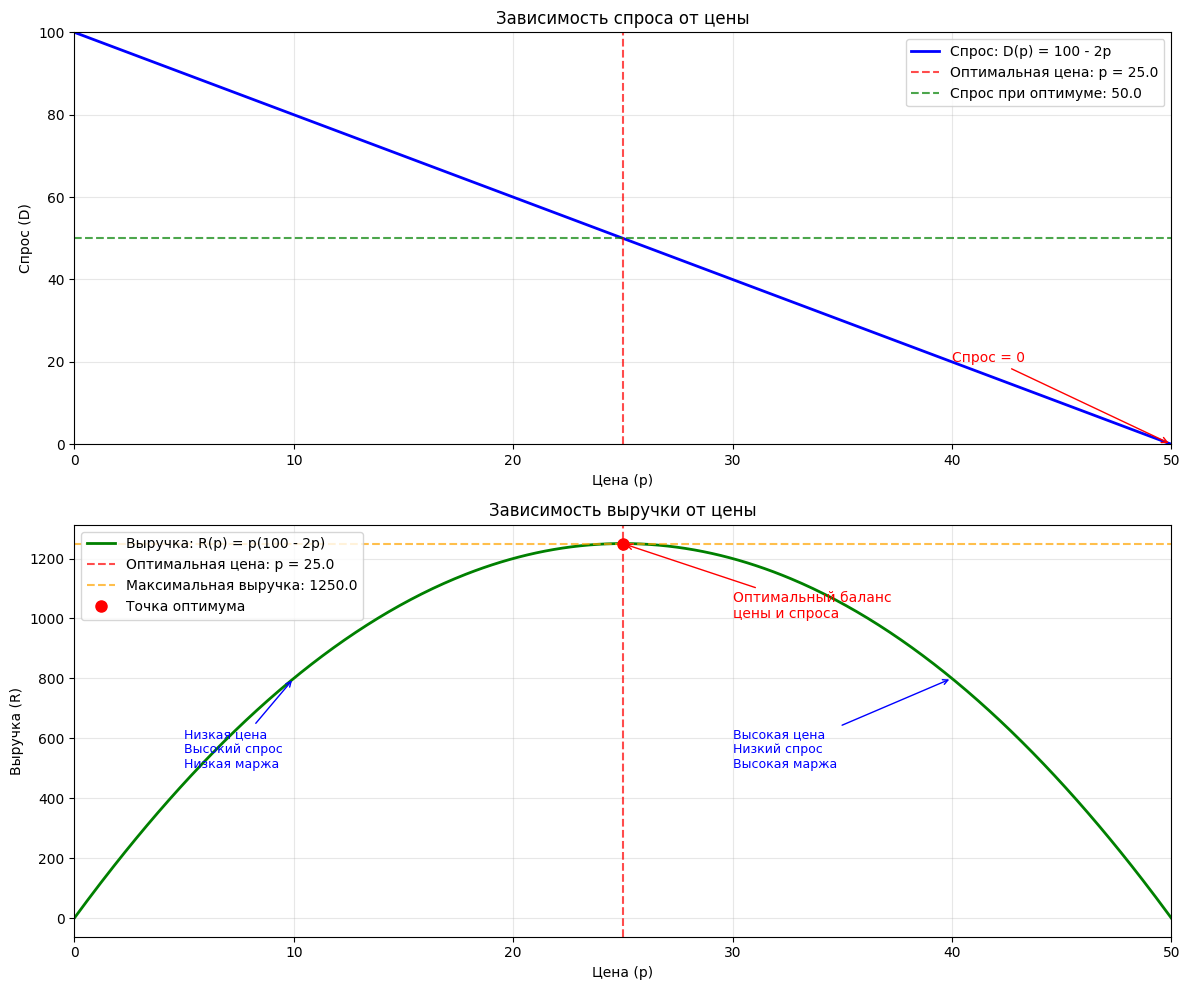


--- Часть 6: Дополнительный анализ ---
Эластичность спроса:
При оптимальной цене p = 25:
  Спрос: D(25) = 50 единиц
  Производная спроса: D'(p) = -2 (постоянная)
  Эластичность спроса по цене: |D'(p) * p / D(p)| = |(-2) * 25 / 50| = 1
  Это означает, что при оптимальной цене спрос имеет единичную эластичность
  (изменение цены на 1% приводит к изменению спроса на 1%)

Рекомендации для стартапа:
1. Установите цену 25 денежных единиц для максимизации выручки
2. При этой цене ожидаемый спрос составит 50 единиц
3. Максимальная возможная выручка: 1250 денежных единиц
4. Любое отклонение от этой цены в большую или меньшую сторону снизит выручку

ВЫВОД: Оптимальная цена найдена успешно!
Математический анализ подтверждает результаты численной оптимизации


In [30]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

print("=== ЗАДАЧА 3: ПОИСК ОПТИМАЛЬНОЙ ЦЕНЫ ДЛЯ СТАРТАПА ===\n")

# --- 1. ПОСТАНОВКА ЗАДАЧИ ---
print("--- Часть 1: Постановка задачи оптимизации ---")

def demand_function(p):
    """
    Функция спроса: demand(p) = 100 - 2*p
    """
    return 100 - 2 * p

def revenue_function(p):
    """
    Функция выручки: revenue(p) = p * demand(p) = p * (100 - 2*p)
    """
    return p * (100 - 2 * p)

# Для scipy.optimize.minimize (минимизация отрицательной выручки)
def objective_function(p):
    """
    Целевая функция для минимизации (отрицательная выручка)
    """
    return -revenue_function(p[0])

# Начальное предположение
initial_guess = [10]  # Начальная цена = 10

# Ограничения: 0 <= p <= 50
bounds = Bounds([0], [50])

print("Функция спроса: demand(p) = 100 - 2*p")
print("Функция выручки: revenue(p) = p * (100 - 2*p) = 100p - 2p²")
print("Целевая функция для scipy: f(p) = -(100p - 2p²)")
print("Начальная цена:", initial_guess[0])
print("Ограничения: 0 <= p <= 50")

# --- 2. РЕШЕНИЕ ЗАДАЧИ ОПТИМИЗАЦИИ ---
print("\n--- Часть 2: Решение задачи оптимизации ---")

# Используем метод L-BFGS-B
method = 'L-BFGS-B'

# Запуск оптимизации
result = minimize(
    fun=objective_function,
    x0=initial_guess,
    method=method,
    bounds=bounds
)

# --- 3. ВЫВОД РЕЗУЛЬТАТОВ ---
print("\n--- Часть 3: Результаты оптимизации ---")

if result.success:
    optimal_price = result.x[0]
    max_revenue = revenue_function(optimal_price)
    optimal_demand = demand_function(optimal_price)
    
    print("✓ Оптимизация завершена успешно!")
    print(f"Оптимальная цена: {optimal_price:.2f} денежных единиц")
    print(f"Спрос при оптимальной цене: {optimal_demand:.2f} единиц")
    print(f"Максимальная выручка: {max_revenue:.2f} денежных единиц")
    print(f"Количество итераций: {result.nfev}")
    print(f"Статус решения: {result.message}")
else:
    print(f"✗ Ошибка оптимизации: {result.message}")

# --- 4. АНАЛИЗ РЕЗУЛЬТАТА ---
print("\n--- Часть 4: Анализ результата ---")
print("Почему именно такая цена является оптимальной?")
print("1. Математический анализ:")
print("   Выручка: R(p) = 100p - 2p²")
print("   Производная: R'(p) = 100 - 4p")
print("   Приравниваем к нулю: 100 - 4p = 0 → p = 25")
print("   Это точка максимума (парабола направлена вниз)")

print("\n2. Экономическая интерпретация:")
print("   - При низких ценах: высокий спрос, но низкая маржа")
print("   - При высоких ценах: высокая маржа, но низкий спрос")
print("   - Оптимум достигается при балансе между ценой и объемом продаж")

print("\n3. Проверка граничных точек:")
prices_to_check = [0, optimal_price, 50]
print("   Цена | Спрос | Выручка")
print("   " + "-" * 25)
for p in prices_to_check:
    d = demand_function(p)
    r = revenue_function(p)
    marker = "← ОПТИМУМ" if p == optimal_price else ""
    print(f"   {p:4.1f} | {d:5.1f} | {r:7.1f} {marker}")

# --- 5. ВИЗУАЛИЗАЦИЯ ---
print("\n--- Часть 5: Визуализация результатов ---")

# Создаем данные для графиков
p_values = np.linspace(0, 50, 500)
demand_values = demand_function(p_values)
revenue_values = revenue_function(p_values)

# Создаем график с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График 1: Функция спроса
ax1.plot(p_values, demand_values, 'b-', linewidth=2, label='Спрос: D(p) = 100 - 2p')
ax1.axvline(x=optimal_price, color='r', linestyle='--', alpha=0.7, 
            label=f'Оптимальная цена: p = {optimal_price:.1f}')
ax1.axhline(y=optimal_demand, color='g', linestyle='--', alpha=0.7, 
           label=f'Спрос при оптимуме: {optimal_demand:.1f}')
ax1.set_xlabel('Цена (p)')
ax1.set_ylabel('Спрос (D)')
ax1.set_title('Зависимость спроса от цены')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 100)

# Отмечаем точку, где спрос становится нулевым
zero_demand_price = 50
ax1.annotate('Спрос = 0', xy=(zero_demand_price, 0), xytext=(40, 20),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

# График 2: Функция выручки
ax2.plot(p_values, revenue_values, 'g-', linewidth=2, label='Выручка: R(p) = p(100 - 2p)')
ax2.axvline(x=optimal_price, color='r', linestyle='--', alpha=0.7, 
           label=f'Оптимальная цена: p = {optimal_price:.1f}')
ax2.axhline(y=max_revenue, color='orange', linestyle='--', alpha=0.7, 
           label=f'Максимальная выручка: {max_revenue:.1f}')
ax2.plot(optimal_price, max_revenue, 'ro', markersize=8, label='Точка оптимума')

ax2.set_xlabel('Цена (p)')
ax2.set_ylabel('Выручка (R)')
ax2.set_title('Зависимость выручки от цены')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 50)

# Добавляем аннотации на график выручки
ax2.annotate('Низкая цена\nВысокий спрос\nНизкая маржа', 
            xy=(10, revenue_function(10)), xytext=(5, 500),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=9, color='blue')

ax2.annotate('Высокая цена\nНизкий спрос\nВысокая маржа', 
            xy=(40, revenue_function(40)), xytext=(30, 500),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=9, color='blue')

ax2.annotate('Оптимальный баланс\nцены и спроса', 
            xy=(optimal_price, max_revenue), xytext=(30, 1000),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

plt.tight_layout()
plt.show()

# --- 6. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ---
print("\n--- Часть 6: Дополнительный анализ ---")
print("Эластичность спроса:")
print("При оптимальной цене p = 25:")
print(f"  Спрос: D(25) = {optimal_demand:.0f} единиц")
print(f"  Производная спроса: D'(p) = -2 (постоянная)")
print("  Эластичность спроса по цене: |D'(p) * p / D(p)| = |(-2) * 25 / 50| = 1")
print("  Это означает, что при оптимальной цене спрос имеет единичную эластичность")
print("  (изменение цены на 1% приводит к изменению спроса на 1%)")

print("\nРекомендации для стартапа:")
print("1. Установите цену 25 денежных единиц для максимизации выручки")
print("2. При этой цене ожидаемый спрос составит 50 единиц")
print("3. Максимальная возможная выручка: 1250 денежных единиц")
print("4. Любое отклонение от этой цены в большую или меньшую сторону снизит выручку")

print("\n" + "="*60)
print("ВЫВОД: Оптимальная цена найдена успешно!")
print("Математический анализ подтверждает результаты численной оптимизации")
print("="*60)

## **Домашнее задание:** Анализ и улучшение модели оптимизации инновационного процесса
**Цель:** Закрепить навыки решения задач непрерывной оптимизации, а также развить критическое мышление и умение анализировать и улучшать математические модели.
Описание:
В классе мы рассматривали задачу оптимизации, связанную с максимизацией прибыли от инновационного продукта, зависящей от уровня R&D (x) и маркетинговых усилий (y). Ваша задача – критически проанализировать эту модель, предложить ее улучшения и провести соответствующие эксперименты.<br>
### **Задание:**<br>
1.	Критический анализ модели:<br>
  * Вспомните (или пересмотрите) функции Revenue(x, y) (доход) и Costs(x, y) (затраты), используемые в классе.
  * Определите минимум три реалистичных ограничения/недостатка текущей модели (например: линейная зависимость затрат от R&D и маркетинга, не учитывается влияние конкурентов, статичная модель не учитывает фактор времени, упрощенная зависимость дохода, и т.д.). Обоснуйте каждый недостаток, указав, почему он делает модель менее реалистичной.<br>

2.	Предложение по улучшению:
  * Выберите ОДИН из выявленных недостатков.
  * Предложите, как можно улучшить модель, чтобы учесть выбранный недостаток. Это может потребовать изменения формул, добавления новых переменных или введения дополнительных ограничений. Опишите изменения математически и словами, поясняя логику.
    * Пример улучшения: Если вы решили, что линейная зависимость затрат не реалистична, то можно ввести нелинейную зависимость, например, Costs(x, y) = a * x^2 + b * y^2 + c * x + d * y, где a, b, c, d – параметры. Это отражает, что при больших объемах R&D и маркетинга затраты растут быстрее.
o	Если вы добавляете новые параметры (например, a, b, c, d из примера выше), обоснуйте их значения, ссылаясь на потенциальные реальные факторы. (Например, “параметр ‘a’ = 2 отражает высокую стоимость масштабирования R&D после определенного уровня”).
3.	Реализация улучшенной модели:
  * Реализуйте улучшенную модель в Python, используя SciPy для оптимизации.
  * Укажите значения параметров, которые вы использовали.
  * Покажите, что ваш код работает (приложите скриншот или выведите результаты работы).
4.	Анализ результатов и сравнение:
  * Сравните результаты, полученные с улучшенной моделью, с результатами, полученными с исходной моделью (используйте те же начальные точки для оптимизации, чтобы сравнение было корректным).
  * Объясните, почему результаты изменились (или не изменились). Свяжите изменения результатов с внесенными улучшениями в модель.
  * Сделайте вывод о том, насколько улучшенная модель более реалистична и полезна для принятия решений в сфере инноваций.
### **Критерии оценки:**
  * Качество критического анализа (30%): Глубина и обоснованность выявленных недостатков.
  * Обоснованность предложенного улучшения (30%): Логичность и математическая корректность предложенного улучшения, а также обоснование значений параметров.
  * Корректность реализации (20%): Правильная реализация улучшенной модели в Python и использование SciPy.
  * Анализ результатов и сравнение (20%): Грамотный анализ полученных результатов и их сравнение с исходной моделью, а также обоснованные выводы.
### **Форма представления:**
  * Отчет в формате PDF или Word (не более 5 страниц).
  * Отчет должен содержать:
    * Краткое описание исходной задачи.
    * Критический анализ исходной модели.
    * Описание предложенного улучшения (математическое и словесное).
    * Реализацию улучшенной модели (код или скриншот).
    * Результаты оптимизации (сравнение исходной и улучшенной моделей).
    * Выводы.
